<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/jun_ml_EDA_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [ ]:
# Required imports
import pandas as pd
import numpy as np
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = plt.get_cmap('Set2')

import itertools

In [ ]:
# Establish a connection to the database by creating a cursor object
conn = psycopg2.connect(f"host={'dsstudents.skillbox.ru'} port={5432} dbname={'db_ds_students'} user={'readonly'} password={'6hajV34RTQfmxhS'}")
# Get all values from the SQL request
sql = "select * from exploratory;"
# Create the DataFrame and print top-5
df = pd.read_sql_query(sql, conn)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,100,100,100,100,100
unique,100,100,100,100,100
top,0.8438229416103058,-1.876484912285567,-1.751870635810515,-0.2990118333509694,-4.098401678335551
freq,1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  100 non-null    object
 1   feature_2  100 non-null    object
 2   feature_3  100 non-null    object
 3   feature_4  100 non-null    object
 4   feature_5  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
df = df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   feature_3  100 non-null    float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.065085,0.037519,3.958900,0.038294,-0.602373
std,1.248609,1.419701,13.300371,1.030048,1.658605
min,-3.042490,-3.593248,-2.725758,-2.566864,-5.325568
25%,-1.076774,-1.099268,-1.214747,-0.778637,-1.652154
50%,0.171540,0.000149,-0.046936,0.000794,-0.251712
75%,0.878959,1.186975,1.089343,0.886191,0.707675
max,2.439930,2.712571,62.381761,2.086148,1.902054


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

Данные распределены близко к нормальному распределению нечие фичи имеют пики в распределении**(feature_1, feature_2, feature_3)**. feature_3 имеет выброс в данных это заметно как на графиках гистограм так и на боксплот и метод дискрайб говорит нам об этом. Фичи распределны около нуля, при этом минимальная граница - -5.32 **(feature_5)**, максимальная -  62.38 (feature_3) это значение является выбросом. Максимальное усредненное значение фич ~ 2.4
 

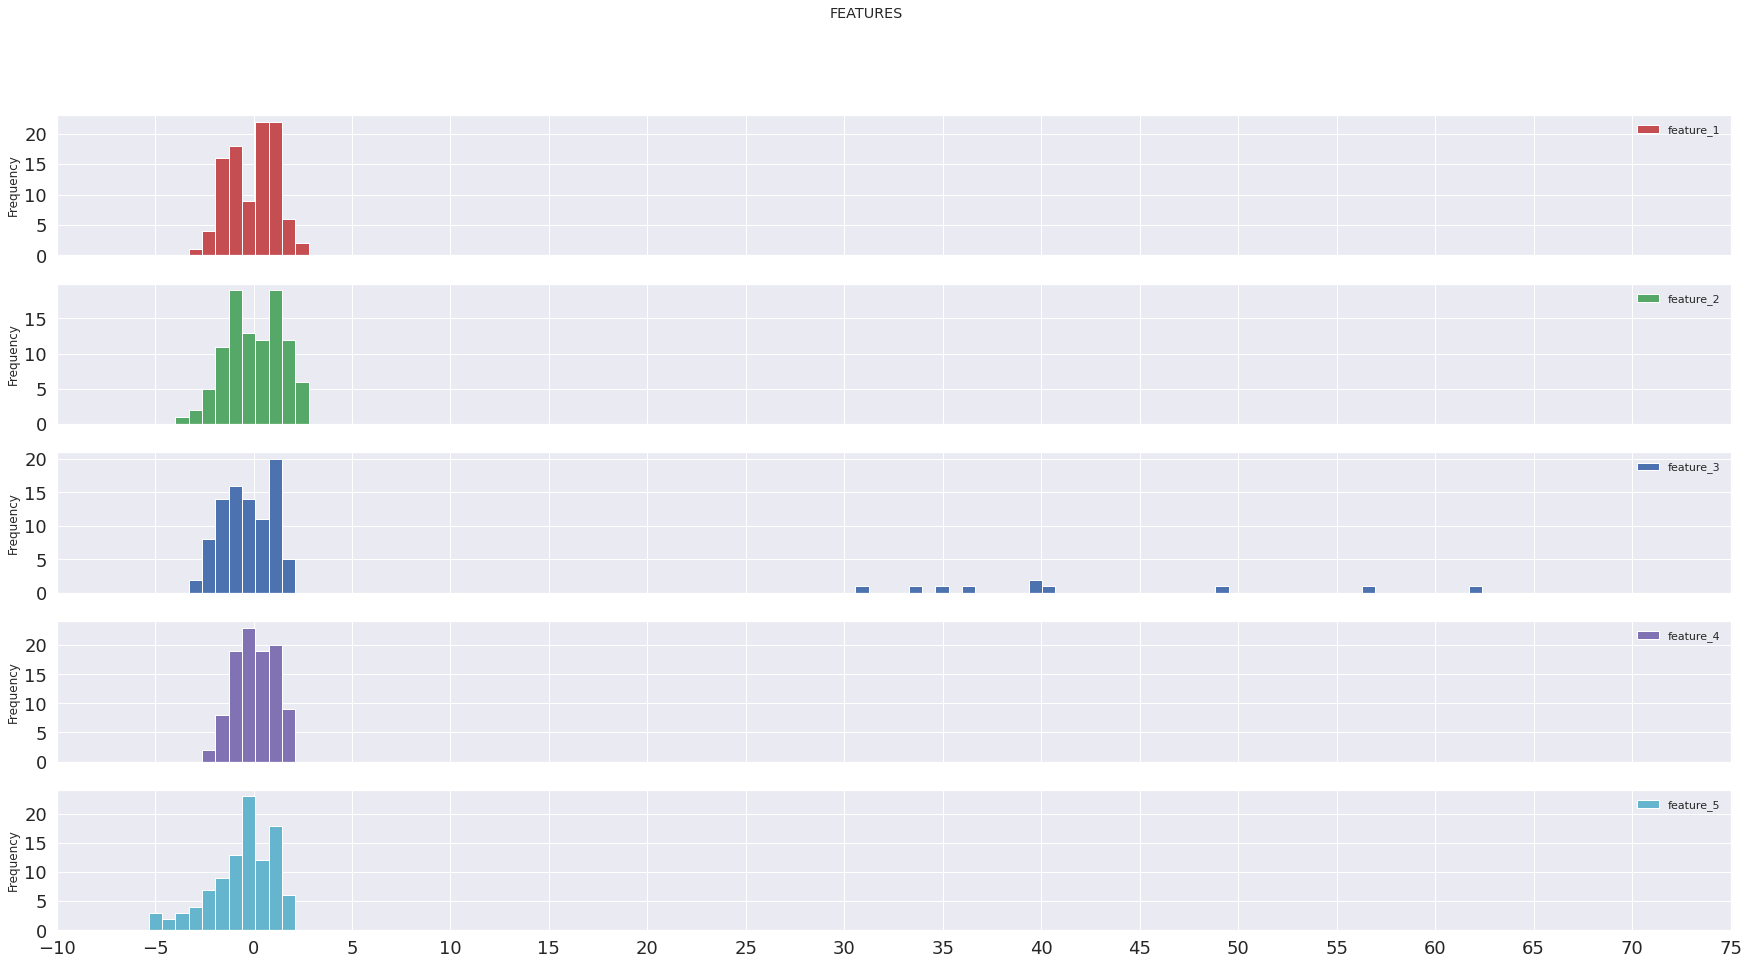

In [ ]:
# Plotting
df.plot(kind='hist', bins=100, subplots=True, grid=True, title="FEATURES",
        layout=(5, 1), sharex=True, sharey=False, legend=True,    
        color=['r', 'g', 'b', 'm', 'c'],
        xticks=np.arange(-10, len(df)-20, 5),
        fontsize=18,
        figsize=(30,15));

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

Данные сконцентрированы у среднего значения выборок, кроме **feature_3** - где выражены выбросы. Значения в плюс.

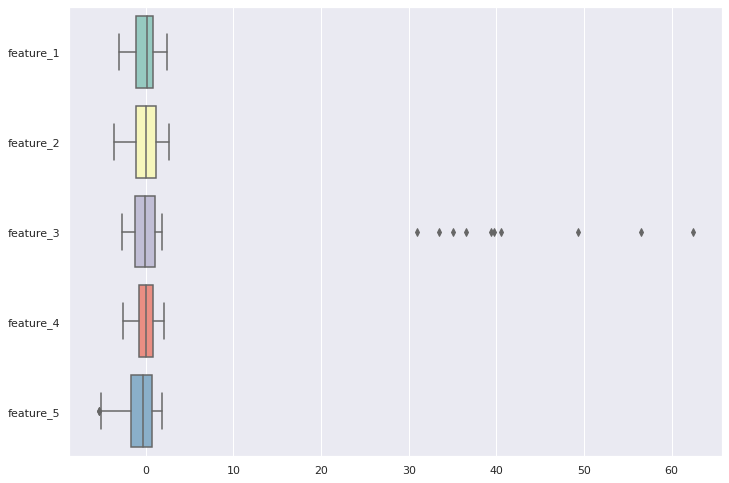

In [ ]:
### YOUR CODE HERE ###

ax = sns.boxplot(data=df, palette="Set3", orient="h")

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

На графиках видна прямая (положительная) зависимость некоторых признаков:
**feature_2 - feature_4**

А так же менее сильная (отриуательная) связь **feature_1 - feature_4**

Так же прослеживаеся отрицальтельная связь между feature_3 - feature_4. Но так как данные там не профайлены и имеют выбросы доверять этой корреляции сомнительно.

<Figure size 2400x800 with 0 Axes>

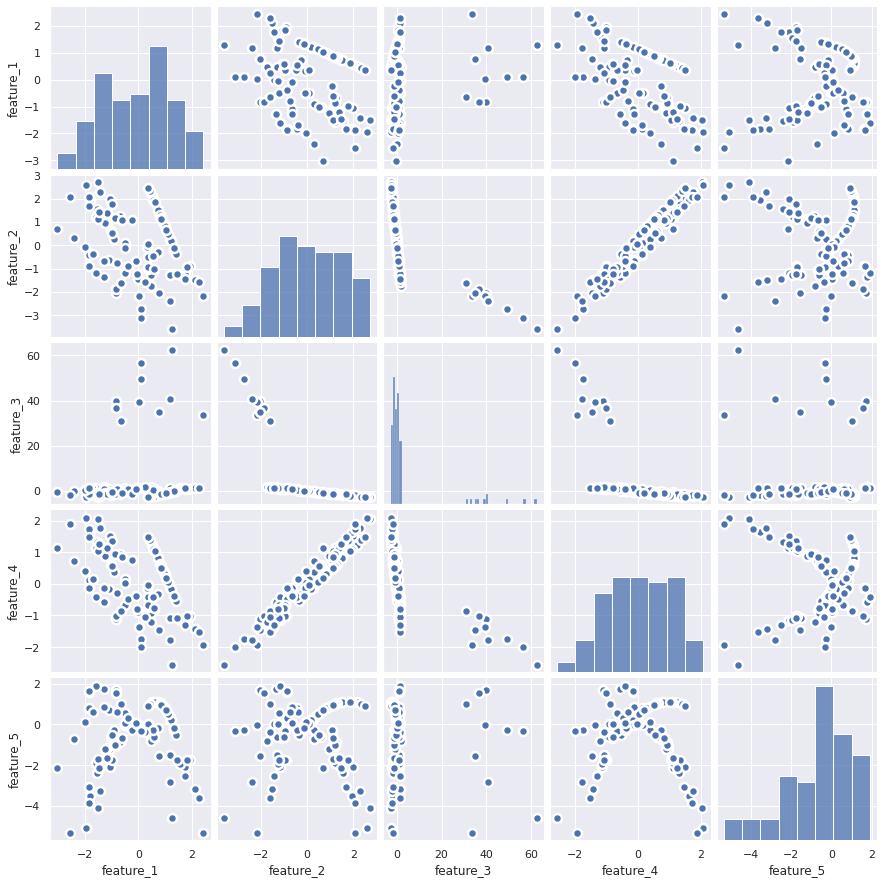

In [ ]:
### YOUR CODE HERE ###

# fig, ax = plt.subplots(4, figsize=(30, 15))
# ax[0].scatter(x = df.feature_4, y = df.feature_1)
# ax[0].set_ylabel("feature_1")

# ax[1].scatter(x = df.feature_4, y = df.feature_2)
# ax[1].set_ylabel("feature_2")

# ax[2].scatter(x = df.feature_4, y = df.feature_3)
# ax[2].set_ylabel("feature_3")

# ax[3].scatter(x = df.feature_4, y = df.feature_5)
# ax[3].set_xlabel("feature_4")
# ax[3].set_ylabel("feature_5")

# plt.show();

plt.figure(figsize=(30,10), dpi= 80)
sns.pairplot(df, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show();

In [30]:
# plotting heatmap

df_cor = df.corr()
df_cor

,feature_1,feature_2,feature_3,feature_4,feature_5
feature_1,1.000000,-0.341856,0.134936,-0.568665,0.069974
feature_2,-0.341856,1.000000,-0.650655,0.967413,-0.062846
feature_3,0.134936,-0.650655,1.000000,-0.605878,-0.104043
feature_4,-0.568665,0.967413,-0.605878,1.000000,-0.073863
feature_5,0.069974,-0.062846,-0.104043,-0.073863,1.000000


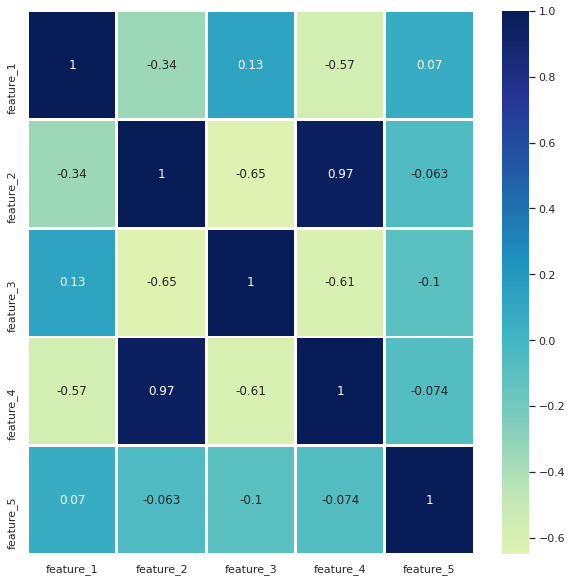

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_cor, center=0, annot=True, linewidths=1.9, cmap="YlGnBu");

In [32]:
# disconnecting
conn.close()